In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')

In [65]:
numerical 

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [66]:
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11.0
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10.0
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1.0
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2.0
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,...,0,2,96,2,96,2,96,2,96,2.0
95408,TX,24,H,M,3,L,F,A,C,1,...,50,1,96,3,96,3,96,3,96,3.0
95409,MI,30,H,M,3,L,E,B,C,3,...,38,1,96,3,95,1,96,10,94,10.0
95410,CA,24,H,F,2,L,F,A,C,1,...,40,5,90,11,96,8,97,1,86,12.0


In [67]:
categorical.isna().sum()
numerical.isna().sum()

TCODE       0
AGE         0
INCOME      0
WEALTH1     0
HIT         0
           ..
AVGGIFT     0
CONTROLN    0
HPHONE_D    0
RFA_2F      0
CLUSTER2    0
Length: 315, dtype: int64

## lower case 


In [68]:
def fe8 (x:str):
    x = x.replace(" ","_")
    x = x.replace("/", "_")
    return x.lower()

categorical.columns = list(map(fe8, categorical.columns))
numerical.columns = list(map(fe8, numerical.columns))
targets.columns =list(map(fe8, targets.columns))

In [69]:
X = pd.concat([numerical,categorical],axis = 1)
y_b = targets['target_b']
y_d = targets['target_d']

In [70]:
data = pd.concat([X,targets], axis=1)
data

,tcode,age,income,wealth1,hit,malemili,malevet,vietvets,wwiivets,localgov,...,minrdate_yr,minrdate_mm,maxrdate_yr,maxrdate_mm,lastdate_yr,lastdate_mm,firstdate_yr,firstdate_mm,target_b,target_d
0,0,60.000000,5,9,0,0,39,34,18,10,...,92,8,94,2,95,12,89,11.0,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,...,93,10,95,12,95,12,93,10.0,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,...,91,11,92,7,95,12,90,1.0,0,0.0
3,0,70.000000,1,4,2,0,23,14,31,3,...,87,11,94,11,95,12,87,2.0,0,0.0
4,0,78.000000,3,2,60,1,28,9,53,26,...,93,10,96,1,96,1,79,3.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,96,2,96,2,96,2,96,2.0,0,0.0
95408,1,48.000000,7,9,1,0,31,43,19,4,...,96,3,96,3,96,3,96,3.0,0,0.0
95409,1,60.000000,5,9,0,0,18,46,20,7,...,96,3,95,1,96,10,94,10.0,0,0.0
95410,0,58.000000,7,9,0,0,28,35,20,9,...,90,11,96,8,97,1,86,12.0,1,18.0


# AS all columns will need numericals values, we are going to encode the categoricals first 

Splitting the data

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_b, test_size = 0.2, random_state =88)

In [72]:
X_train_cat = X_train.select_dtypes(include = object)
X_train_num =X_train.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)
X_test_num =X_test.select_dtypes(include = np.number)

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [74]:
encoder = OneHotEncoder(handle_unknown = 'error').fit(X_train_cat)

cols = encoder.get_feature_names_out(input_features = X_train_cat.columns)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns = cols)

X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded, columns = cols)

In [75]:
# encoder_cat = OneHotEncoder(handle_unknown = 'error').fit(categorical)
# cols_cat = encoder.get_feature_names_out(input_features = categorical.columns)

# categorical_encoded = encoder_cat.transform(categorical).toarray()
# categorical_encoded_df = pd.DataFrame(categorical_encoded, columns = cols_cat)

Checking the variance threshold in the numericals.

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_min_scaled = scaler.fit_transform(numerical)

In [77]:
from sklearn.feature_selection import VarianceThreshold 
var_threshold = 0.02
sel = VarianceThreshold(threshold=(var_threshold))

selector = sel.fit_transform(numerical_min_scaled)

temp = pd.DataFrame(selector)
print(numerical_min_scaled.shape)
print(temp.shape)

(95412, 315)
(95412, 79)


In [78]:
sel.variances_ > var_threshold   # withc col is greater than the threshold value
sel.get_support()
var_list = list(sel.get_support())
list(zip(numerical.columns, var_list))

[('tcode', False),
 ('age', True),
 ('income', True),
 ('wealth1', True),
 ('hit', False),
 ('malemili', False),
 ('malevet', False),
 ('vietvets', True),
 ('wwiivets', True),
 ('localgov', False),
 ('stategov', False),
 ('fedgov', False),
 ('wealth2', True),
 ('pop901', False),
 ('pop902', False),
 ('pop903', False),
 ('pop90c1', True),
 ('pop90c2', True),
 ('pop90c3', True),
 ('pop90c4', False),
 ('pop90c5', False),
 ('eth1', True),
 ('eth2', True),
 ('eth3', False),
 ('eth4', False),
 ('eth5', False),
 ('eth6', False),
 ('eth7', False),
 ('eth8', False),
 ('eth9', False),
 ('eth10', False),
 ('eth11', False),
 ('eth12', False),
 ('eth13', False),
 ('eth14', False),
 ('eth15', False),
 ('eth16', False),
 ('age901', False),
 ('age902', False),
 ('age903', False),
 ('age904', False),
 ('age905', False),
 ('age906', False),
 ('age907', False),
 ('chil1', False),
 ('chil2', False),
 ('chil3', False),
 ('agec1', False),
 ('agec2', False),
 ('agec3', False),
 ('agec4', False),
 ('agec5', F

In [79]:
list_to_drop = [col[0] for col in zip(numerical.columns, var_list) if col[1] == False]  # of col to be dropped
list_to_keep = [col[0] for col in zip(numerical.columns, var_list) if col[1] == True]

In [80]:
removed_columns = pd.DataFrame(data=(numerical.columns,sel.variances_,sel.get_support()), index=('column_name','variance','statement')).T
removed_columns.loc[(removed_columns['statement'] == False),:]

,column_name,variance,statement
0,tcode,0.000175,False
4,hit,0.001491,False
5,malemili,0.002618,False
6,malevet,0.013424,False
9,localgov,0.001968,False
...,...,...,...
306,minramnt,0.000077,False
307,maxramnt,0.000025,False
308,lastgift,0.000195,False
309,timelag,0.000051,False


In [81]:
nums = numerical.drop(list_to_drop, axis = 1)
nums

,age,income,wealth1,vietvets,wwiivets,wealth2,pop90c1,pop90c2,pop90c3,eth1,...,hc17,hc18,hc19,mhuc1,mhuc2,cardprom,controln,hphone_d,rfa_2f,cluster2
0,60.000000,5,9,34,18,5,0,35,65,92,...,33,65,40,6,2,27,95515,0,4,39
1,46.000000,6,9,55,11,9,99,0,0,67,...,99,0,99,20,4,12,148535,0,2,1
2,61.611649,3,1,29,33,1,0,2,98,96,...,22,77,17,9,2,26,15078,1,4,60
3,70.000000,1,4,14,31,0,0,8,92,61,...,23,77,22,16,2,27,172556,1,4,41
4,78.000000,3,2,9,53,9,99,0,0,2,...,99,1,21,6,2,43,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,61.611649,5,9,47,11,9,99,0,0,78,...,93,7,98,16,4,6,184568,0,1,12
95408,48.000000,7,9,43,19,9,96,0,4,91,...,69,31,67,18,5,4,122706,1,1,2
95409,60.000000,5,9,46,20,9,99,0,0,82,...,99,0,99,5,2,14,189641,1,3,34
95410,58.000000,7,9,35,20,7,99,0,0,92,...,99,0,99,12,3,36,4693,1,4,11


In [85]:
nums_min_scaled = scaler.fit_transform(nums)

AS we can see, the variance threshold did not remove columns in numericals

## Select kbest 

In [86]:
X_num = nums_min_scaled
y = y_b

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(chi2, k = 25).fit_transform(X_num, y)
# Here we choose 30 so that is easier to analyze results later, as we will see
selected = pd.DataFrame(kbest)
selected

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.666667,0.010101,0.079833,0.105833,0.230769,0.153846,0.020202,0.070707,0.131313,0.272727,...,0.000000,0.515152,0.747475,0.313131,0.464646,0.285714,0.433333,0.498045,1.000000,0.622951
1,0.833333,0.000000,0.911333,0.869667,0.923077,0.769231,0.979798,0.989899,0.989899,0.989899,...,0.478632,0.666667,0.393939,0.979798,0.000000,0.952381,0.183333,0.774510,0.333333,0.000000
2,0.333333,0.020202,0.082833,0.091000,0.153846,0.076923,0.000000,0.010101,0.060606,0.181818,...,0.000000,0.313131,0.848485,0.505051,0.313131,0.428571,0.416667,0.078617,1.000000,0.967213
3,0.000000,0.000000,0.166667,0.210500,0.153846,0.076923,0.101010,0.252525,0.505051,0.696970,...,0.997863,0.262626,0.676768,0.393939,0.555556,0.761905,0.433333,0.899764,1.000000,0.655738
4,0.333333,0.989899,0.096000,0.099000,0.307692,0.230769,0.000000,0.010101,0.020202,0.161616,...,0.534188,0.111111,0.656566,0.060606,0.676768,0.285714,0.700000,0.037079,0.333333,0.409836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0.666667,0.101010,0.164667,0.170833,0.461538,0.461538,0.020202,0.101010,0.494949,0.737374,...,0.040598,0.707071,0.262626,0.787879,0.090909,0.761905,0.083333,0.962399,0.000000,0.180328
95408,1.000000,0.030303,0.279833,0.287167,0.230769,0.230769,0.181818,0.717172,0.888889,0.919192,...,0.358974,0.616162,0.515152,0.949495,0.060606,0.857143,0.050000,0.639828,0.000000,0.016393
95409,0.666667,0.141414,0.062667,0.062833,0.307692,0.230769,0.000000,0.000000,0.000000,0.010101,...,0.431624,0.262626,0.828283,0.000000,1.000000,0.238095,0.216667,0.988852,0.666667,0.540984
95410,1.000000,0.010101,0.403500,0.409833,0.846154,0.769231,0.898990,0.969697,1.000000,1.000000,...,0.933226,0.464646,0.505051,0.171717,0.010101,0.571429,0.583333,0.024466,1.000000,0.163934


In [88]:
model = SelectKBest(chi2, k = 25).fit(X_num, y)
df = pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] = nums.columns
display(df.sort_values(by = ['score'], ascending = False))

,score,Column
77,2.102908e+02,rfa_2f
28,2.647458e+01,hvp1
29,2.575749e+01,hvp2
30,2.154508e+01,hvp3
33,1.926139e+01,hvp6
...,...,...
15,7.824761e-03,dw5
49,1.700394e-03,tpe13
26,2.302786e-04,hhd5
5,1.483320e-04,wealth2


In [103]:
cols = df.sort_values(by = ['score'], ascending = False).head(25)['Column']
col_list = list(cols)

Concat data 

In [107]:
raw_data = pd.concat([nums[cols], y], axis = 1)
scaler = MinMaxScaler()
raw_data_scaled = scaler.fit_transform(raw_data)


Heatmap for correlation with the target and multicolinearity

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

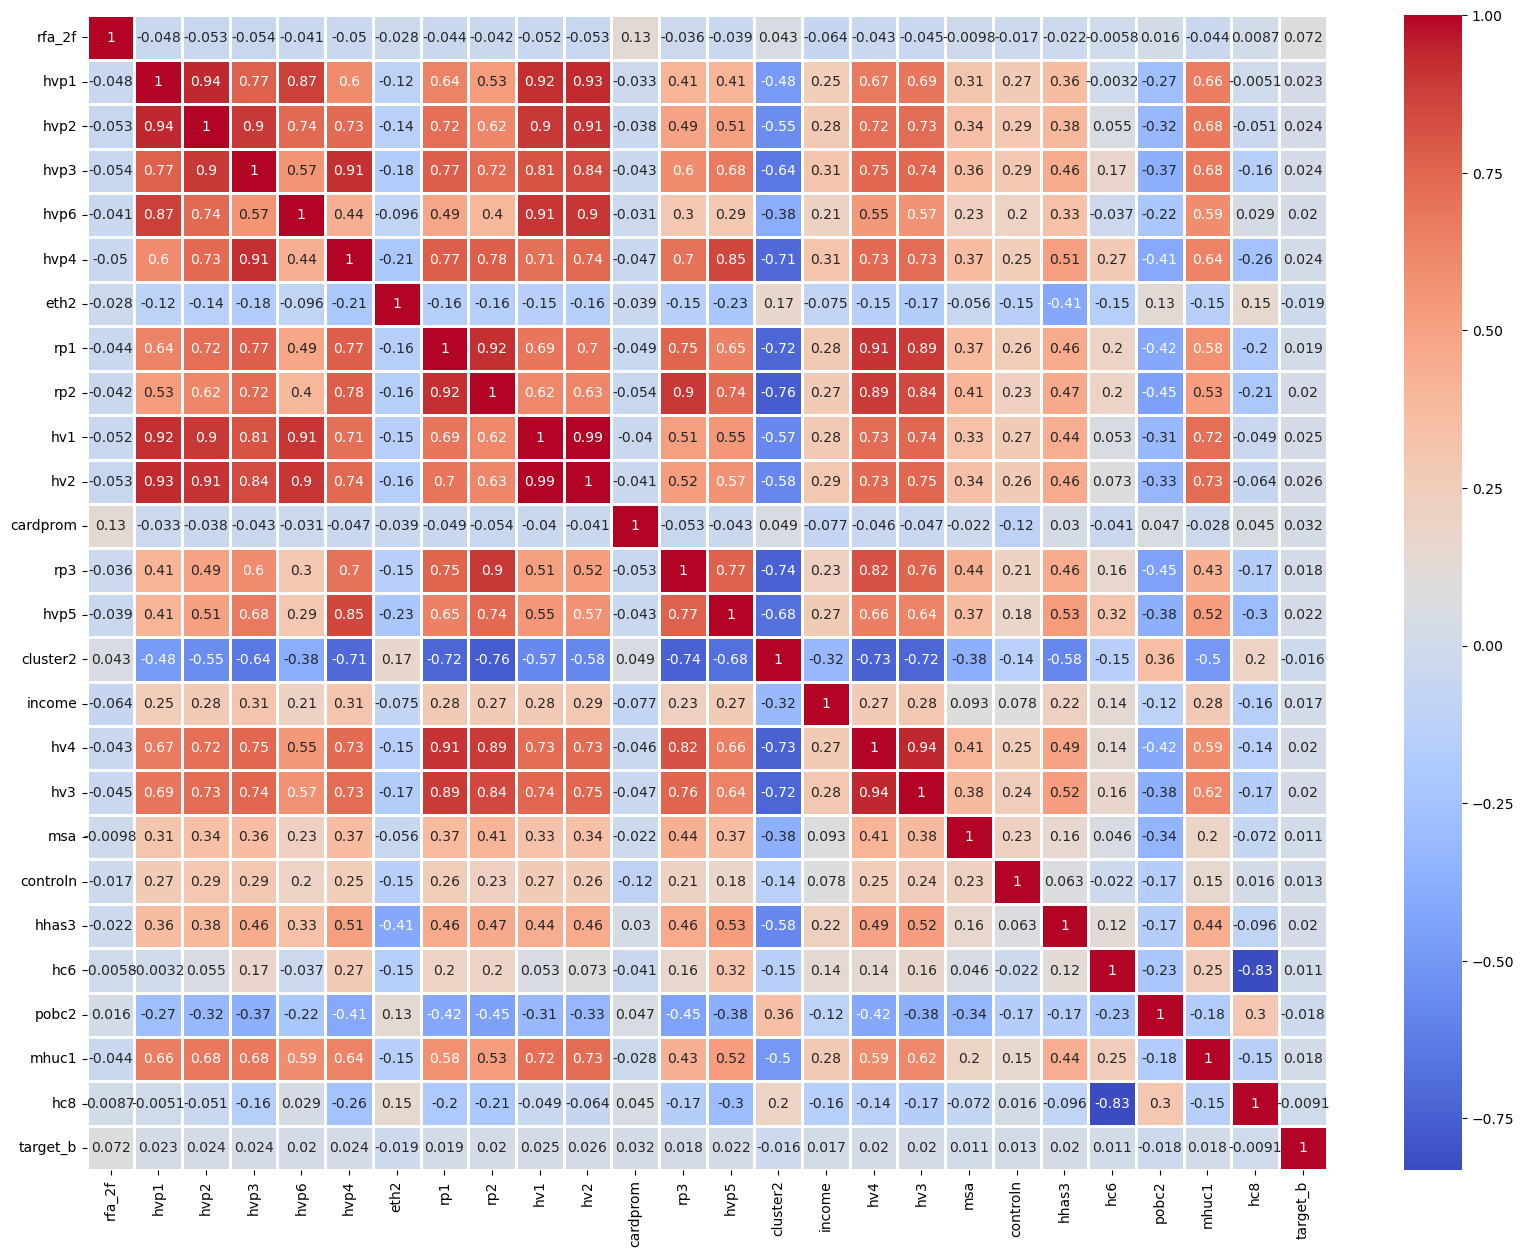

In [109]:
corr_matrix = raw_data.corr(method= 'pearson')
fig, ax = plt.subplots(figsize = (20,15))
ax = sns.heatmap(corr_matrix, annot= True, cmap = sns.color_palette("coolwarm", as_cmap = True), linewidth = 0.9)
plt.show()

grouping multicolinear columns

In [110]:
cols_multicorl = ['hvp1', 'hvp2', 'hvp3', 'hvp4', 'hvp5', 'hvp6', 'hv1', 'hv2']   #  'hv3', 'hv4' are highly corr with each other but not highly corr with the other ones in the list 

I will keep Hv2 as it has the highest corr with the target 

In [145]:
# plt.figure(figsize = (12,8))
# for column in raw_data[cols_multicorl]:
#     sns.kdeplot(raw_data[column])
#     plt.show()

In [119]:
data_refined = raw_data.drop(['hvp1', 'hvp2', 'hvp3', 'hvp4', 'hvp5', 'hvp6', 'hv1'], axis =1)
data_refined

,rfa_2f,eth2,rp1,rp2,hv2,cardprom,rp3,cluster2,income,hv4,hv3,msa,controln,hhas3,hc6,pobc2,mhuc1,hc8,target_b
0,4,1,2,5,635,27,17,39,5,2,3,0.0,95515,51,31,74,6,46,0
1,2,0,91,91,5218,12,91,1,6,10,12,4480.0,148535,66,97,39,20,0,0
2,4,2,0,2,546,26,9,60,3,1,2,0.0,15078,31,50,84,9,31,0
3,4,0,1,8,1263,27,17,41,1,1,2,9340.0,172556,26,39,67,16,55,0
4,2,98,25,58,594,43,74,26,3,3,4,5000.0,7112,11,6,65,6,67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,10,69,84,1025,6,92,12,5,6,6,380.0,184568,70,78,26,16,9,0
95408,1,3,16,26,1723,4,44,2,7,3,3,3360.0,122706,61,94,51,18,6,0
95409,3,14,3,34,377,14,78,34,5,3,4,4040.0,189641,26,0,82,5,99,0
95410,4,1,88,88,2459,36,90,11,7,10,11,8735.0,4693,46,17,50,12,1,1


Imbalance data and adressing this issue

In [128]:
from sklearn.utils import resample

category_0 = data_refined[data_refined['target_b'] == 0]
category_1 = data_refined[data_refined['target_b'] == 1]
print(category_0.shape)
print(category_1.shape)


(90569, 19)
(4843, 19)


## Classifier Algorythm 

In [149]:
X_refined = data_refined.drop(['target_b'], axis =1)
y_refined = data_refined['target_b']

In [150]:
from sklearn.tree import DecisionTreeClassifier
X_train_refined, X_test_refined, y_train_refined, y_test_refined = train_test_split(X_refined, y_refined, test_size = 0.2, random_state =88)

In [151]:
model = DecisionTreeClassifier(max_depth = 5)  # depth higher tend to over fit the train set
model.fit(X_refined, y_refined)  

DecisionTreeClassifier(max_depth=5)

In [152]:
print("train data accuracy was ", model.score(X_train_refined, y_train_refined))
print("test data accuracy was ",model.score(X_test_refined, y_test_refined))

train data accuracy was  0.9502679191395145
test data accuracy was  0.9455536341246136


## oversampling method to the imbalance method

In [153]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

In [154]:
print(category_0.shape)
print(category_1_oversampled.shape)

(90569, 19)
(90569, 19)


In [155]:
data_oversampled = pd.concat([category_0, category_1_oversampled], axis=0)

## Classifier algorythm with oversample data

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
X_oversamp = data_oversampled.drop(['target_b'], axis =1)
y_oversamp = data_oversampled['target_b']

In [158]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_oversamp, y_oversamp, test_size = 0.2, random_state =88)

In [159]:
model = DecisionTreeClassifier(max_depth = 5)  # depth higher tend to over fit the train set
model.fit(X_train_over, y_train_over)  

DecisionTreeClassifier(max_depth=5)

In [160]:
print("train data accuracy was ", model.score(X_train_over, y_train_over))
print("test data accuracy was ",model.score(X_test_over, y_test_over))

train data accuracy was  0.5883444896832517
test data accuracy was  0.5849619079165287


## Classifier with log regression

In [163]:
scaler_2 = StandardScaler()
X_train_refined_scaled = scaler_2.fit_transform(X_train_refined)
X_test_refined_scaled = scaler_2.transform(X_test_refined)

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test_refined_scaled)


print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test_refined,pred))
print("f1: ",f1_score(y_test_refined,pred))

precision:  0.06518533084259168
recall:  0.6381135707410972
f1:  0.1182872435325602


c:\Users\Emmanuel\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_refined,pred)

array([[8536, 9508],
       [ 376,  663]], dtype=int64)

## Classifier with SMOTE

In [162]:
from imblearn.over_sampling import SMOTE

In [174]:
sm = SMOTE(random_state=100, k_neighbors = 6)
X_train_refined_SMOTE, y_train_refined_SMOTE = sm.fit_resample(X_train_refined_scaled, y_train_refined)

In [175]:
X_train_refined_SMOTE.shape

(145050, 18)

In [176]:

logreg = LogisticRegression(random_state=0, solver='lbfgs')
logreg.fit(X_train_refined_SMOTE, y_train_refined_SMOTE)
pred_smote = logreg.predict(X_test_refined_scaled)

print("precision: ",precision_score(y_test_refined, pred_smote))
print("recall: ",recall_score(y_test_refined, pred_smote))
print("f1: ",f1_score(y_test_refined, pred_smote))

precision:  0.07487542617361657
recall:  0.5495668912415784
f1:  0.13179457587997692


In [177]:
confusion_matrix(y_test_refined, pred_smote)

array([[10989,  7055],
       [  468,   571]], dtype=int64)

to conclude our analysis, we adress the issue of the imbalance on the data , by 2 methods and we came to a conclusion

On a conservative point of view, we are basing our analysis on the recall metrics:

- in the SMOTE methods, we have more false negative than in the oversampling method

- in the over sampling, we have less false negative but a lot more false positive (over 2000)

AS our model is to predict the donations for a charity and therefore not a life or death issue, i choose the smote to adress my imbalanced data